# House prediction


Nous pouvons reprendre le dataset que nous avions vu la semaine dernière sur la prédiction du prix d'une maison.

Cette fois, l'intérêt n'est plus de vous montrer la pipeline de ML mais de faire du ML à proprement parler ! 

Les données sont issues de Kaggle, disponibles sur [ce lien](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).


Elles comportent : 

- un ensemble d'entraînement (train.csv) à utiliser pour cross-valider les modèles 
- un ensemble de test (test.csv) à n'utiliser que pour la prédiction finale
- un dictionnaire de données (data_description.txt)

# 0. EDA

In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

X, y = df.drop(["SalePrice", "Id"], axis=1), df["SalePrice"]


Combien y a t il de colonnes ? et de lignes ? 

Supprimer les colonnes avec plus de 10% de valeurs manquantes.

Supprimer les lignes avec plus de 10% des valeurs manquantes

In [29]:
df.dropna(inplace=True)

Quelles sont les colonnes numériques ? Et catégorielles ?  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemodAdd 

Inspectez les variables catégorielles

MSZoning


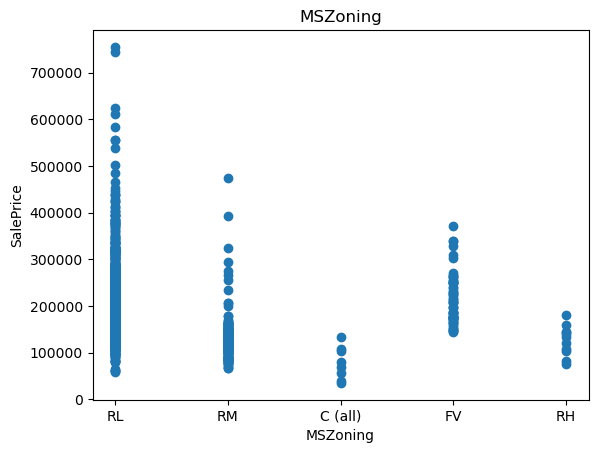

Street


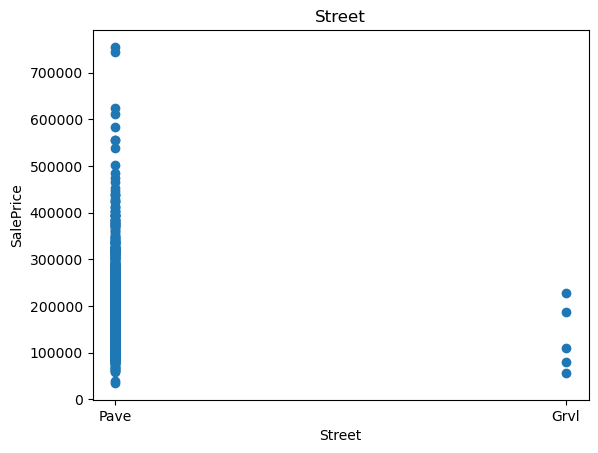

LotShape


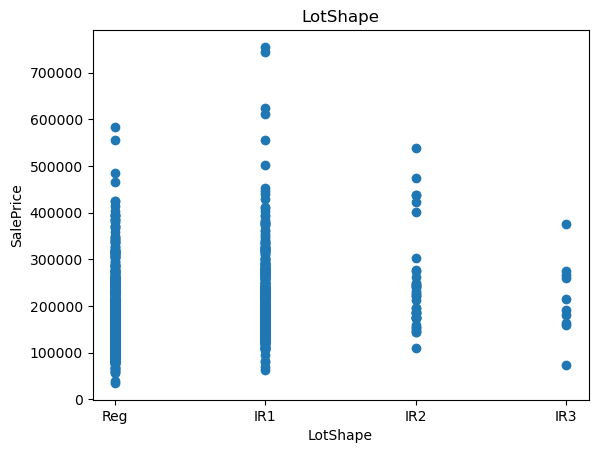

LandContour


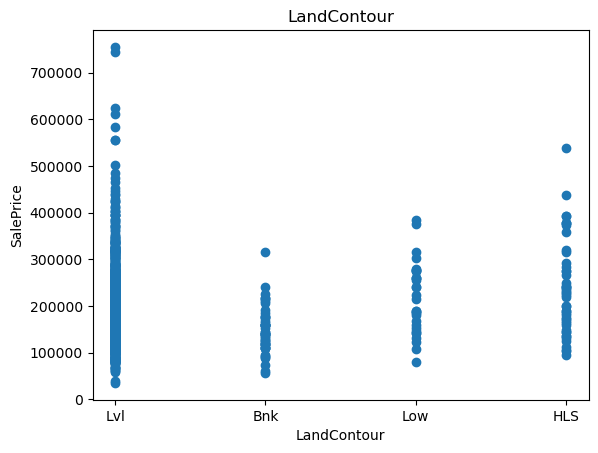

Utilities


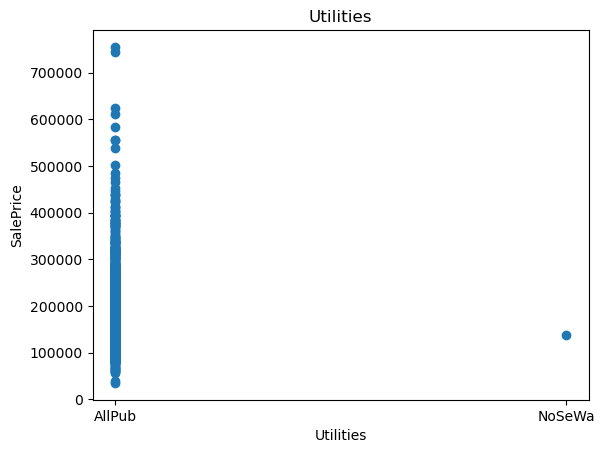

LotConfig


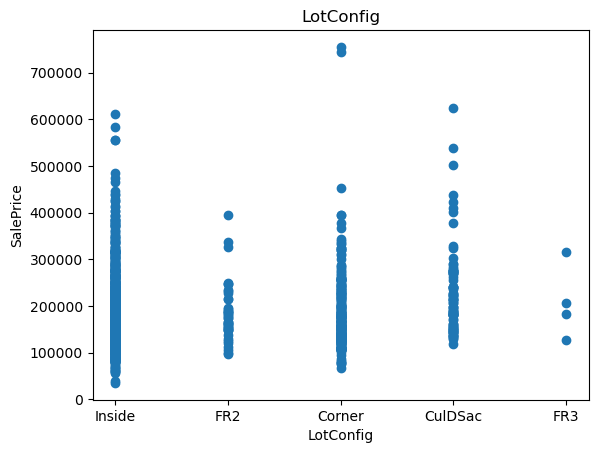

LandSlope


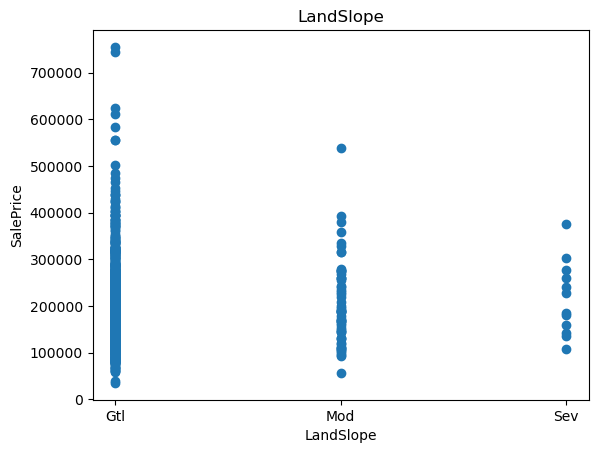

Neighborhood


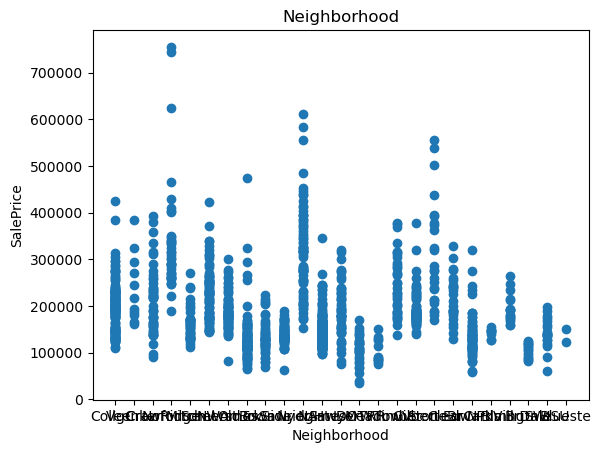

Condition1


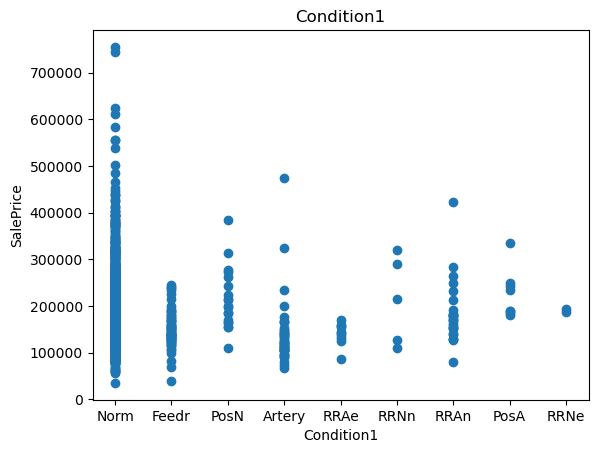

Condition2


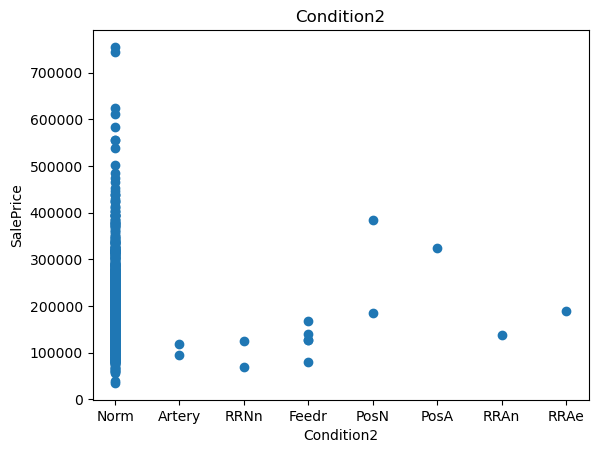

BldgType


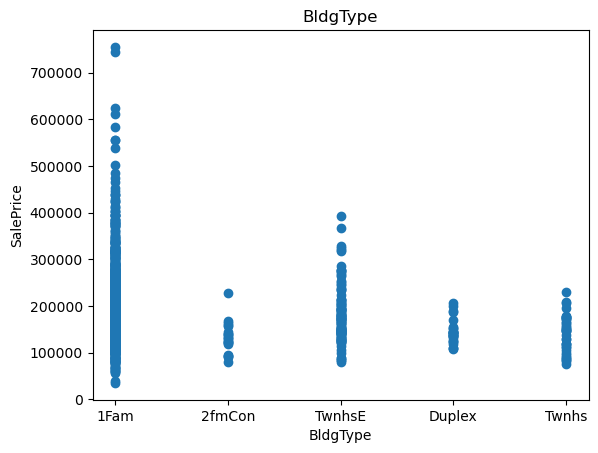

HouseStyle


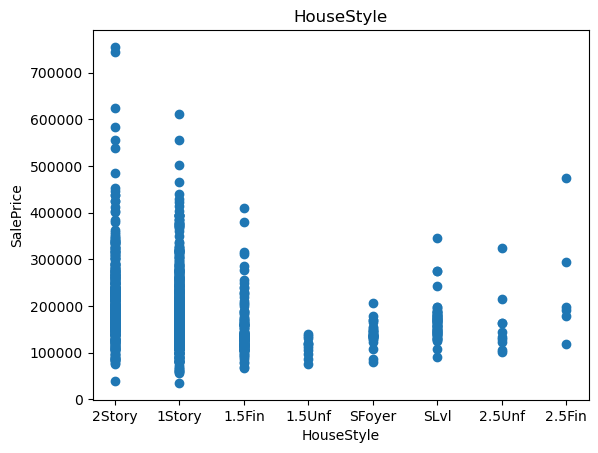

RoofStyle


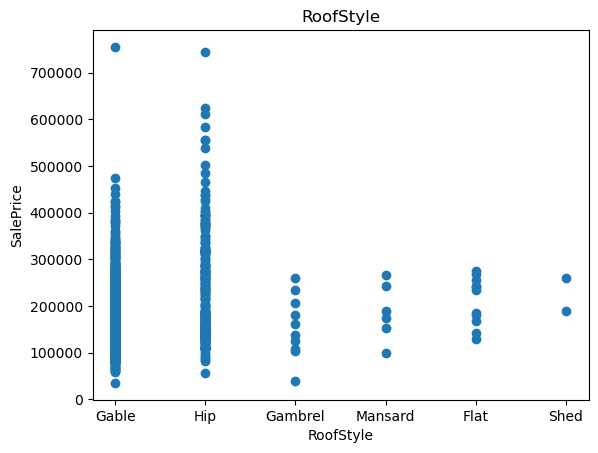

RoofMatl


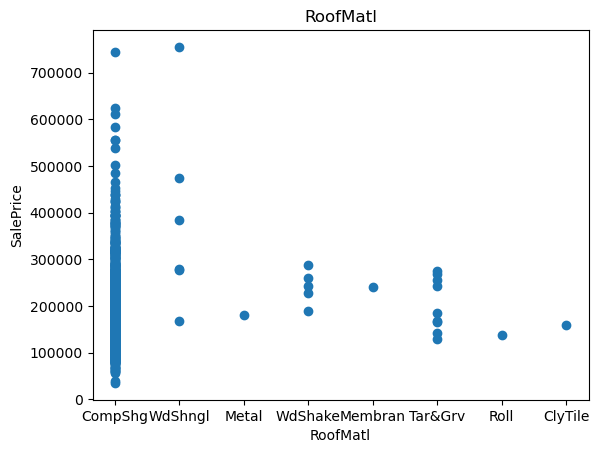

Exterior1st


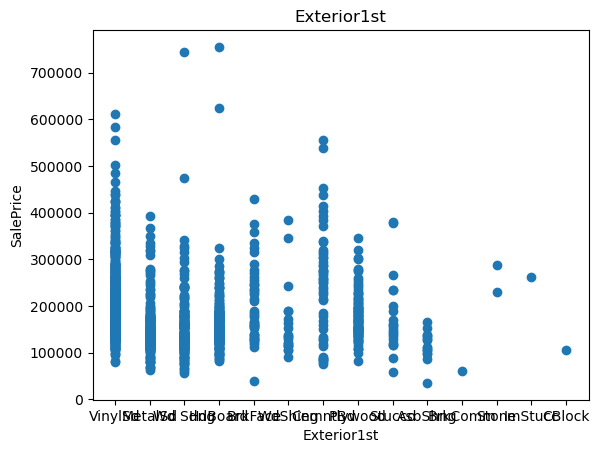

Exterior2nd


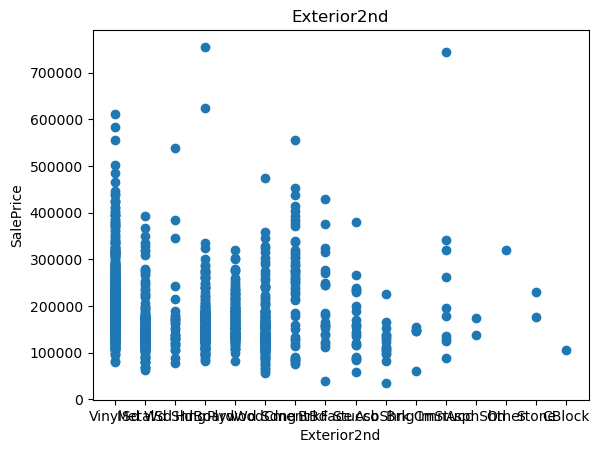

ExterQual


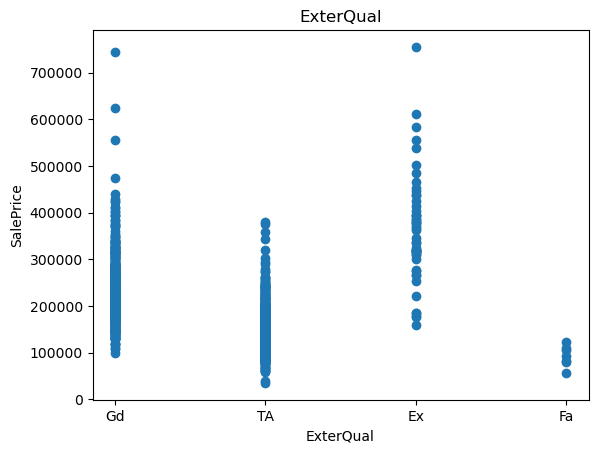

ExterCond


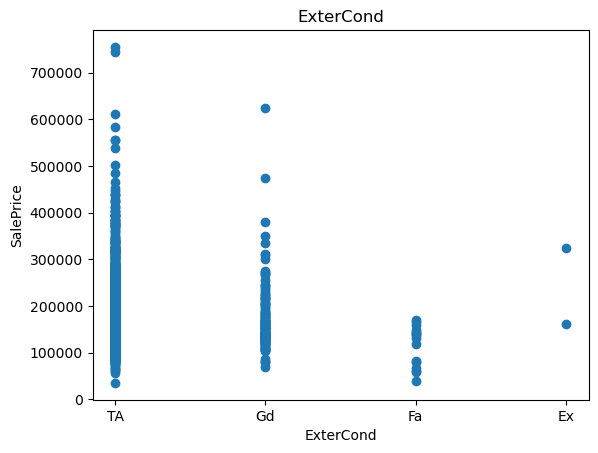

Foundation


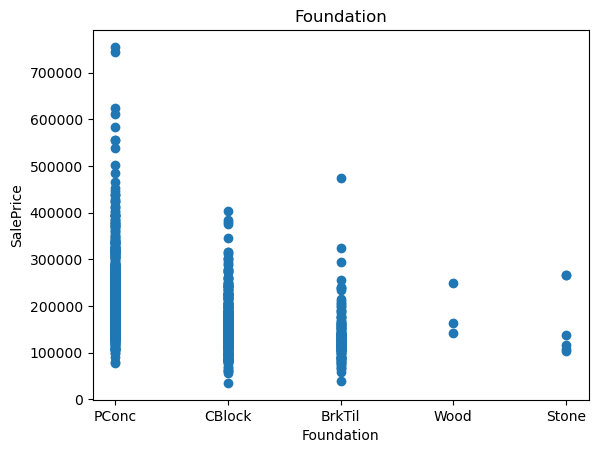

BsmtQual


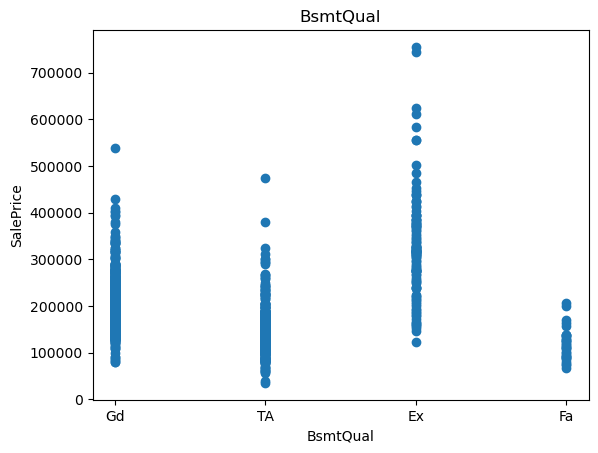

BsmtCond


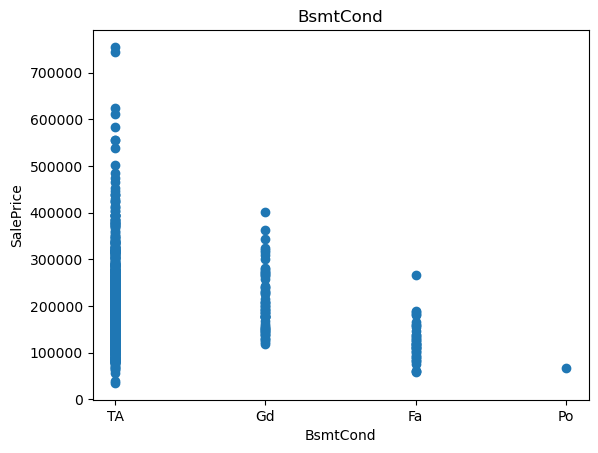

BsmtExposure


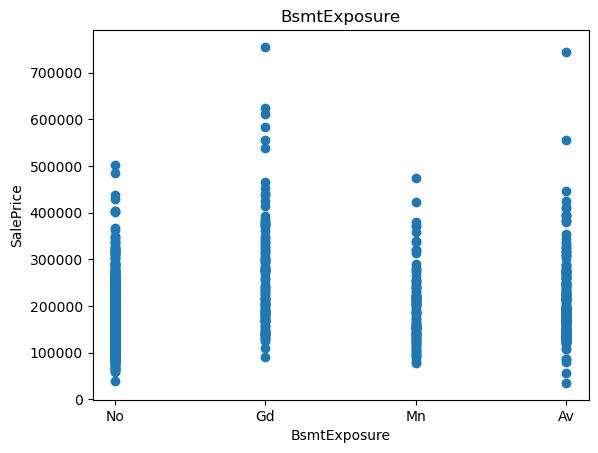

BsmtFinType1


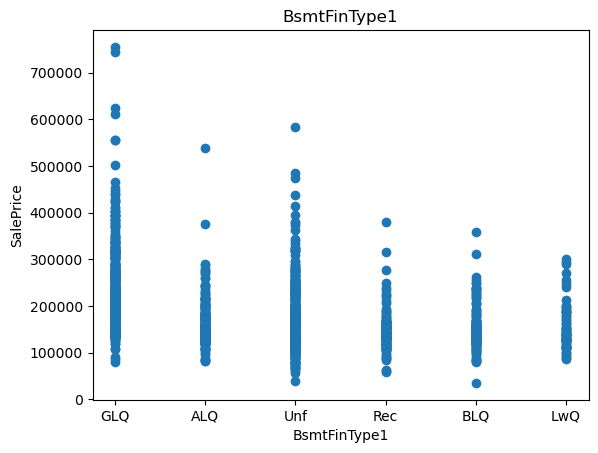

BsmtFinType2


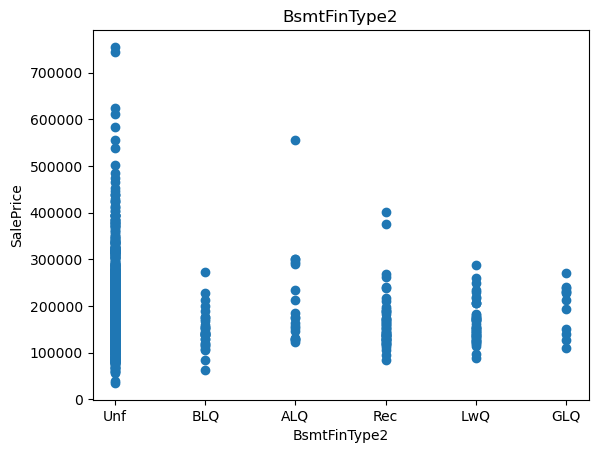

Heating


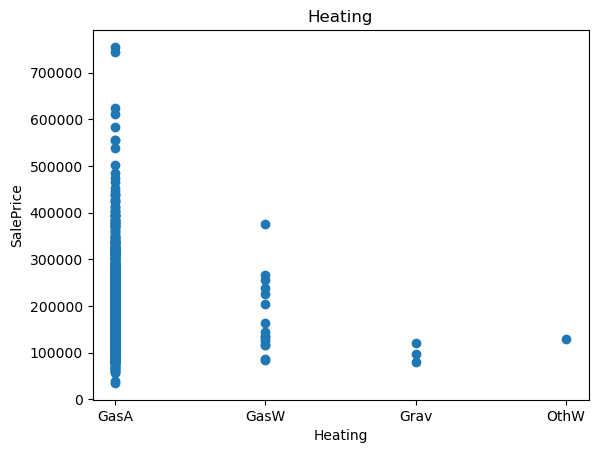

HeatingQC


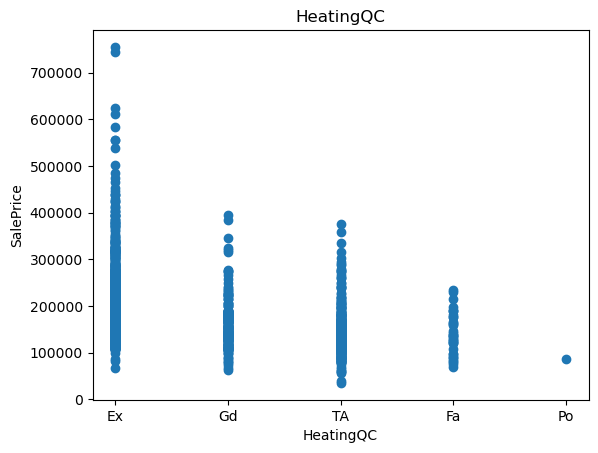

CentralAir


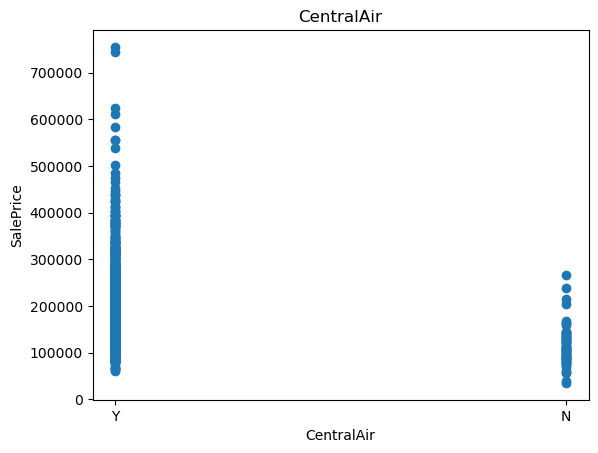

Electrical


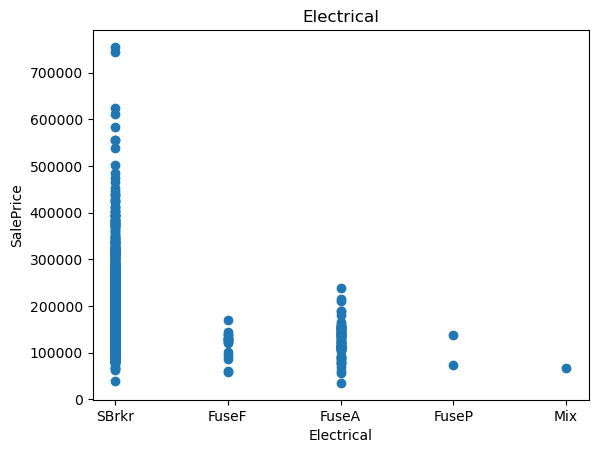

KitchenQual


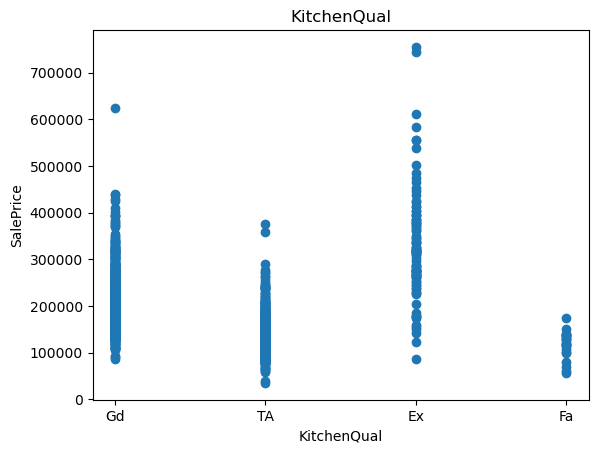

Functional


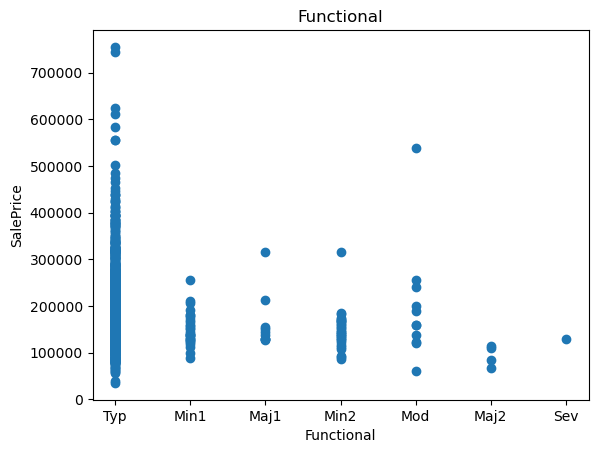

GarageType


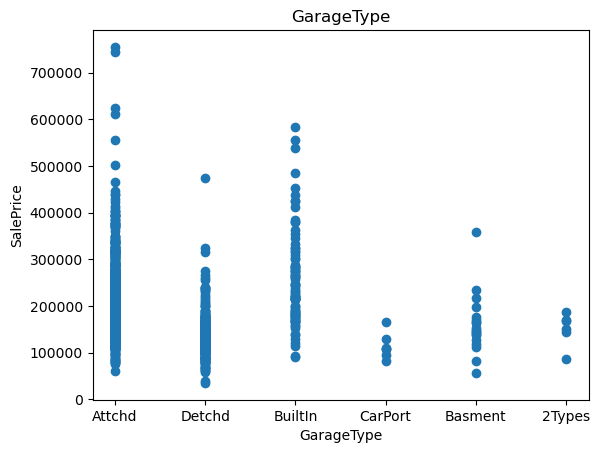

GarageFinish


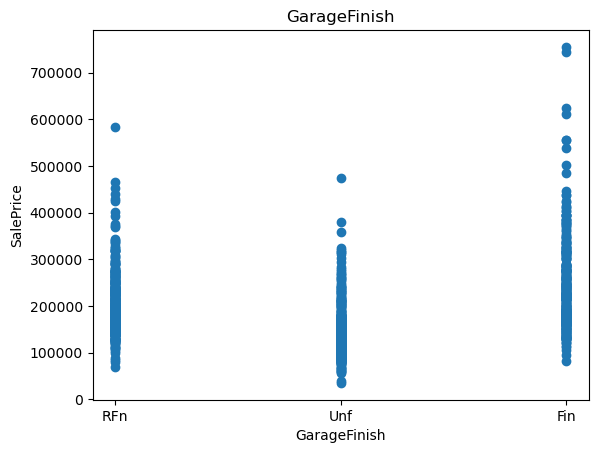

GarageQual


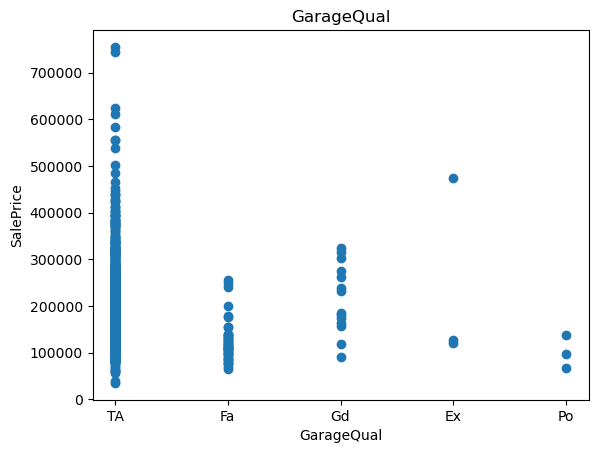

GarageCond


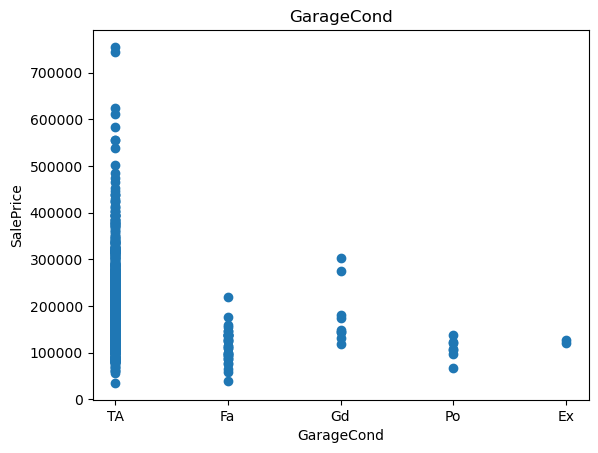

PavedDrive


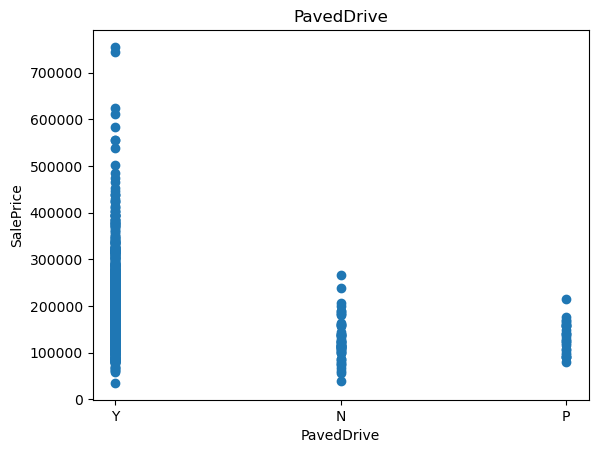

SaleType


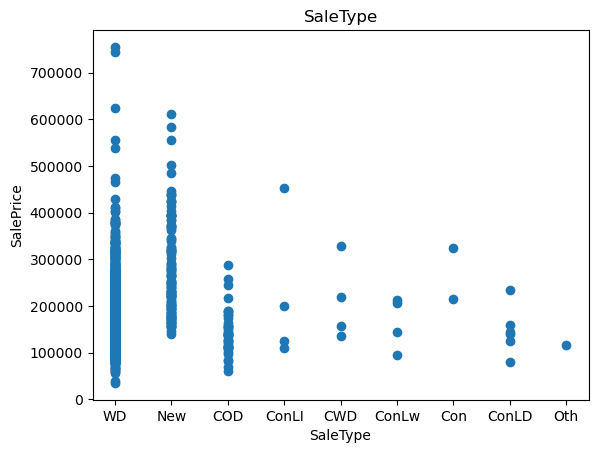

SaleCondition


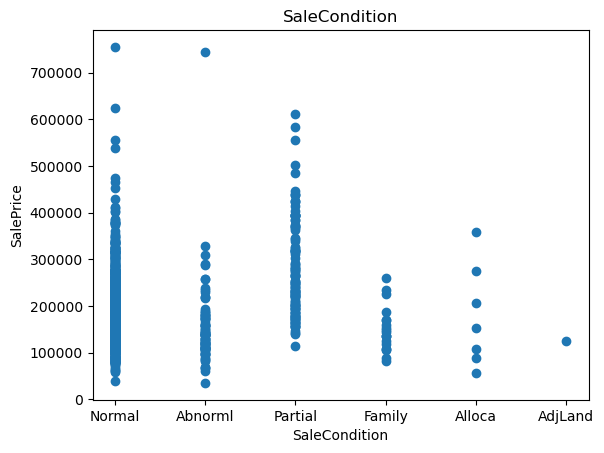

In [34]:
df_cat = df.select_dtypes(include=['object'])
for col in df_cat.columns:
    print(col)
    plt.scatter(df_cat[col], df["SalePrice"])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

Quelles sont celles qui vous paraissent le plus informatives pour discriminer les prix de ventes ? 

- qui ont des valeurs de ventes différentes selon les catégories
- qui ont beaucoup de valeurs dans chaque catégories
- qui ont du sens d'après le dictionnaire de données ? 
- ne sont pas déjà prises en compte dans les variables quantitatives

Vous pouvez regarder l'association entre les variables pour enlever les variables redondantes.

In [ ]:
from skrub import TableReport
# pip install skrub si vous ne l'avez pas déjà

TableReport(df_cat, max_plot_columns=37, max_association_columns=37)

Processing column  37 / 37


,,,,,,,,,,,,,,,


Gardez moins de 10 variables catégorielles et encodez les proprement avec `OneHotEncoder` ou `OrdinalEncoder`. 

Tracez les matrices de corrélation entre ces variables.

*Autres hypothèses que vous voudriez tester*

On considère que dans un dataset normal, 5% des données sont des outliers.

Vous pouvez les enlever avec `sklearn.ensemble.IsolationForest`.

# 1. Feature engineering

Normalisez (au sens de rendre normal / gaussien) les dimensions trop asymétriques (*skewness*) pour favoriser la régression linéaire : a minima la target **SalePrice** et les features d'aire (avec SF dedans).

Créez de nouvelles variables représentant :

- l’âge du bien au moment de la vente ;
  
- l’âge depuis la dernière rénovation ;
  
- l’âge du garage au moment de la vente ;
  
- et l’ancienneté de la transaction par rapport à l’année de référence du dataset (2010)

*Votre feature engineering*

# 2. Modélisation


Créez une baseline avec un `DummyRegressor`

Cross validez une régression linéaire simple

Performez une gridsearch en régularisant avec des pénalités L1 et L2 avec `ElasticNet`.

*Si vous avez le temps* : Gridsearchez (ou tout autre optimisation des hyperparamètres) avec d'autres modèles : que le meilleur sur l'ensemble de test gagne, attention à l'overfitting !